In [2]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
from functions.multi_gradient_descent import *

In [3]:
def feature_scaling(data):
    if len(data.shape) >1:
        k = np.zeros(data.shape[1])
        # for r in range(data.shape[0]):
        for c in range(data.shape[1]):
            k[c] = np.sum(data[:,c])
        k = k/data.shape[0]
        for c in range(data.shape[1]):
            f = np.max(data[:,c]) - np.min(data[:,c])
            data[:,c] -= k[c]
            data[:,c] /= f
        return data
    else:
        return (data-(np.sum(data)/data.shape[0]))/(np.max(data) - np.min(data))


In [4]:
file = "./data from book/advertising.csv"
data = pd.read_csv(file)
print(data.head())
x_data = np.array([[x,x**2] for x in data['TV']])
x_test = x_data[150:]
x_data = x_data[0:150]

y_data = np.array(data['sales'])
y_test = y_data[150:]
y_data = y_data[0:150]


   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [5]:
# # fetaure scaling
# x_data = feature_scaling(x_data)
# y_data = feature_scaling(y_data)

In [11]:
w = np.array([0.0907175772,-0.0000437060026])
b=0.10165765468193186
per_w,per_b = gradient_descent(x_data,y_data,w,b,0.000000001,50000)
print(per_w, per_b)

[ 9.07176862e-02 -4.37064719e-05] 0.1016576569353075 -------------------------------- j:  10.43947704809548 dj_dw:  [-109.03710707    0.46932061] dj_db:  -2.2533756453528273
[ 9.07187766e-02 -4.37111620e-05] 0.10165767946892418 -------------------------------- j:  10.439358106455419 dj_dw:  [-109.03531712    0.46901575] dj_db:  -2.2533502300492527
[ 9.07198669e-02 -4.37158521e-05] 0.10165770200228667 -------------------------------- j:  10.439239168722663 dj_dw:  [-109.03352593    0.46900799] dj_db:  -2.2533248093238107
[ 9.07209573e-02 -4.37205422e-05] 0.10165772453539496 -------------------------------- j:  10.439120234897088 dj_dw:  [-109.03173477    0.46900029] dj_db:  -2.2532993890148836
[ 9.07220476e-02 -4.37252321e-05] 0.10165774706824902 -------------------------------- j:  10.439001304978552 dj_dw:  [-109.02994364    0.46899258] dj_db:  -2.2532739691234958
[ 9.07231379e-02 -4.37299220e-05] 0.10165776960084891 -------------------------------- j:  10.43888237896694 dj_dw:  [-109

In [12]:
# t = np.arange(0,150,1)
# t = np.array([[x,x**2] for x in t])
# pred = predict_graph(t,per_w,per_b)
pred = predict_graph(x_data,per_w,per_b)
pred

array([18.67413524,  4.24047868,  1.73254319, 13.11852896, 15.28516598,
        0.93153343,  5.40004105, 10.67839398,  0.92205284, 16.62938243,
        6.15483515, 17.65008276,  2.34790423,  8.82753904, 16.92696526,
       16.32234416,  6.30287912, 21.85884155,  6.4245103 , 12.79863586,
       17.898988  , 19.14858941,  1.35678938, 18.55606186,  5.82252933,
       20.75054297, 12.46100399, 19.32228452, 19.87540107,  6.54588188,
       22.52493804, 10.09062957,  8.80262148, 20.9151196 ,  8.67785491,
       22.39886574, 20.99401585,  6.89983399,  4.11426774, 18.53634124,
       16.81652283, 15.0105854 , 22.56491752, 17.11942367,  2.46843163,
       14.87257795,  8.17580873, 19.30945133, 18.48369466,  6.22455058,
       16.62938243,  9.06779422, 17.76466978, 15.41456297, 20.7383137 ,
       16.56678774,  0.7986846 , 11.94195796, 17.38576042, 17.37895644,
        5.04563655, 20.65256049, 19.27091996,  9.25754944, 11.54287811,
        6.40715031,  3.05853397, 12.1828526 , 19.14858941, 17.79

[ 9.59515385e-02 -6.62199285e-05] 0.10176723


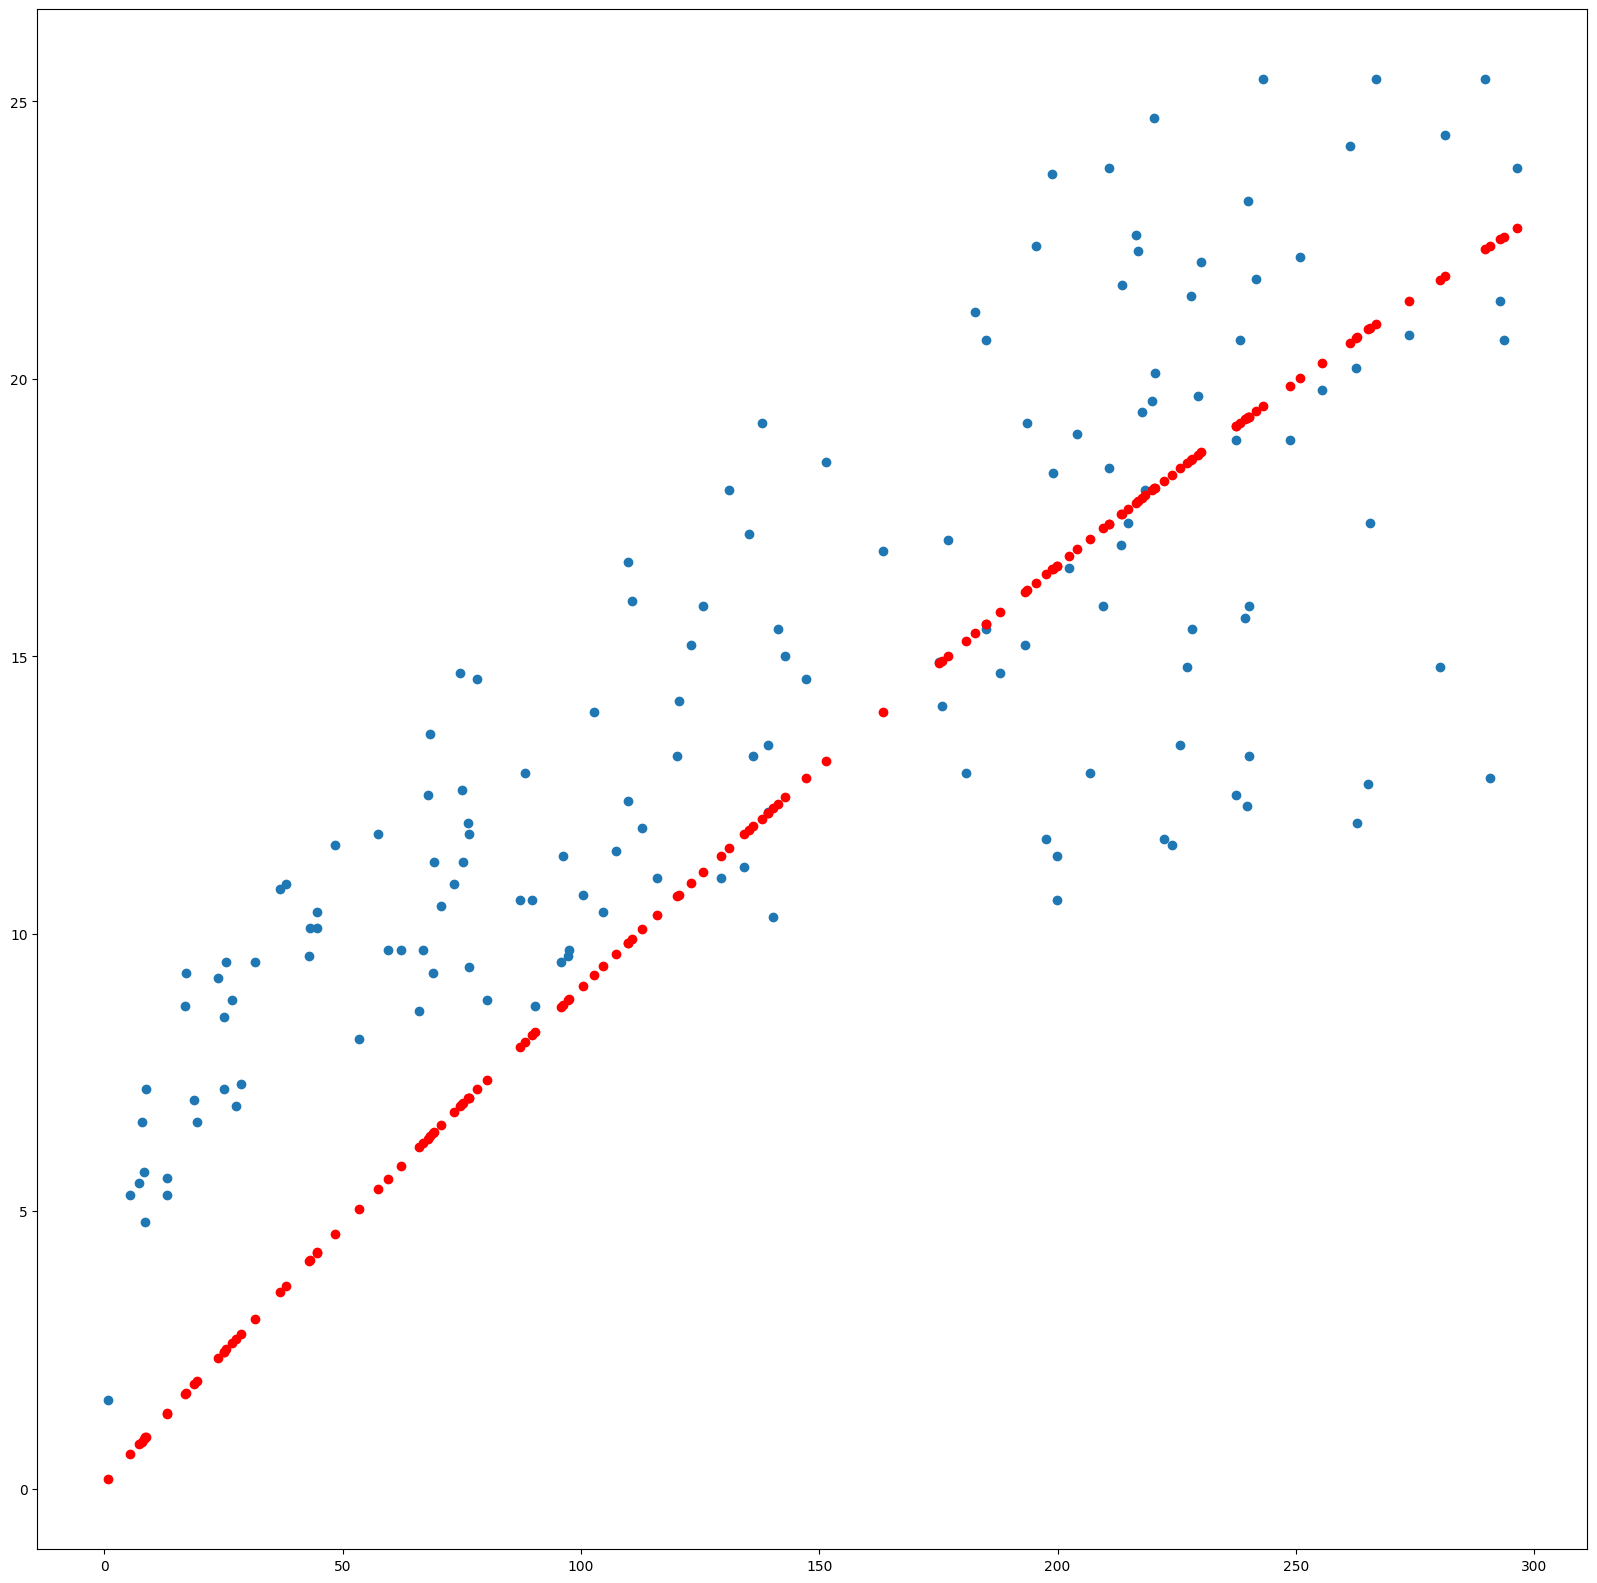

In [13]:
print(per_w,'%.08f' %per_b)
pl.figure(figsize=[20,20])
pl.scatter(x_data[:,0],y_data)
pl.scatter(x_data[:,0],pred,color= "red")
pl.show()

In [14]:
print(accuracy(x_test, y_test,per_w,per_b))

32.631152858665885


In [15]:
# 47 percent error 
#with enormous number of iterations 32.63
# feature scalling 98 percent error


In [ ]:
# w = np.array([0.0907175772,-0.0000437060026])
# b=0.10165765468193186